In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------------------- -- 7.6/8.0 MB 39.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 38.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 42.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 37.5 MB/s eta 0:00:00


In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [7]:
X_train.shape


(50000, 32, 32, 3)

##### Here the third dimension 3 - represents the RGB (Red,Green,Blue)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

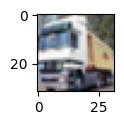

In [11]:
plot_sample(1)

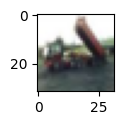

In [12]:
plot_sample(2)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

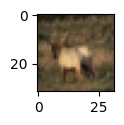

In [14]:
plot_sample(3)

In [15]:
y_train[3]

array([4], dtype=uint8)

In [17]:
classes[y_train[3][0]]

'deer'

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### One Hot Encoding

In [24]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype='float32'
)

In [26]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [27]:
32*32*3

3072

In [31]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), # input layer
    keras.layers.Dense(3000,activation='relu'), # hidden layer 1
    keras.layers.Dense(3000,activation='relu'), # hidden layer 2
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy', 
# when ever we have one hot encoded categorical value we should use 'categorical_Crossentropy'
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8112 - accuracy: 0.3557
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6200 - accuracy: 0.4304
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5382 - accuracy: 0.4566
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4772 - accuracy: 0.4836
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4266 - accuracy: 0.4964
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3856 - accuracy: 0.5127
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3451 - accuracy: 0.5277
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3063 - accuracy: 0.5406
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2775 - accuracy: 0.5515
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.246

In [41]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 0s 1ms/step


'ship'

In [40]:
classes[y_test[1][0]]

'ship'

In [42]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 2.0177 - accuracy: 0.4929


[2.0177299976348877, 0.492900013923645]

In [43]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32, 32, 3)), # input layer
            keras.layers.Dense(3000,activation='relu'), # hidden layer 1
            keras.layers.Dense(3000,activation='relu'), # hidden layer 2
            keras.layers.Dense(10, activation='sigmoid') # output layer
            ])

    model.compile(optimizer='SGD',
              loss='categorical_crossentropy', 
# when ever we have one hot encoded categorical value we should use 'categorical_Crossentropy'
              metrics=['accuracy'])

    return model

#### CPU Benchmarking

In [44]:
%%timeit -n1 -r1  # arguments for executing it only once
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 52s 33ms/step - loss: 1.8099 - accuracy: 0.3582
52.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### GPU Benchmarking

In [45]:
%%timeit -n1 -r1  # arguments for executing it only once
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 6s 3ms/step - loss: 1.8091 - accuracy: 0.3580
6.47 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
